Project Statement:
1. While searching for the dream house, the buyer looks at various factors, not just at
the height of the basement ceiling or the proximity to an east-west railroad.
2. Using the dataset, find the factors that influence price negotiations while buying a house.
3. There are 79 explanatory variables describing every aspect of residential homes inAmes, Iowa.

In [689]:
#import software
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### 1. Understand the dataset



In [690]:
#import data
df = pd.read_csv('/Users/michaeldionne/Library/CloudStorage/Dropbox/AI_ML Bootcamp/Caltech-AI-Machine-Learning-Bootcamp/Course4_Applied Data Science with Python/Final Project/1669096535_feature_engineering_dataset/PEP1.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [691]:
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


a. ID the shape of the dataset


In [692]:
#identify the shape of the dataset
df.shape


(1460, 81)

b. ID the variables with null values

In [693]:
# Identify variables with null values
df.isna().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

c. ID the variables with unique values

In [694]:
#Identify variables with unique values 
for i in df.columns:
    print (i , ":", df[i].unique())
    print (" _ "*40)
    print (" _ "*40)


Id : [   1    2    3 ... 1458 1459 1460]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47.

### 2. Generate a separate dataset for numerical and categorical variables


In [695]:
numeric_df= df.select_dtypes(include=[np.number])
numeric_df


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [696]:
categoric_df=df.select_dtypes(exclude=[np.number])
categoric_df


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [697]:
numericcol=numeric_df.columns.tolist()
categorycol=categoric_df.columns.tolist()
print ("Category :",categorycol)
print ("\n Numeric :",numericcol)


Category : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

 Numeric : ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'Op

### 3. EDA of numerical variables
#### a. Missing value treatment

In [698]:
# Missing Value Treatment of Numerical Values
numeric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [699]:
numeric_df.isna().sum(axis=0)


Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
Bedroom            0
Kitchen            0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

## No Missing Values

In [700]:
#Identify the skewness of the data
numeric_df.skew(axis = 0, skipna = True)
 

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
Bedroom           0.211790
Kitchen           4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

<AxesSubplot:>

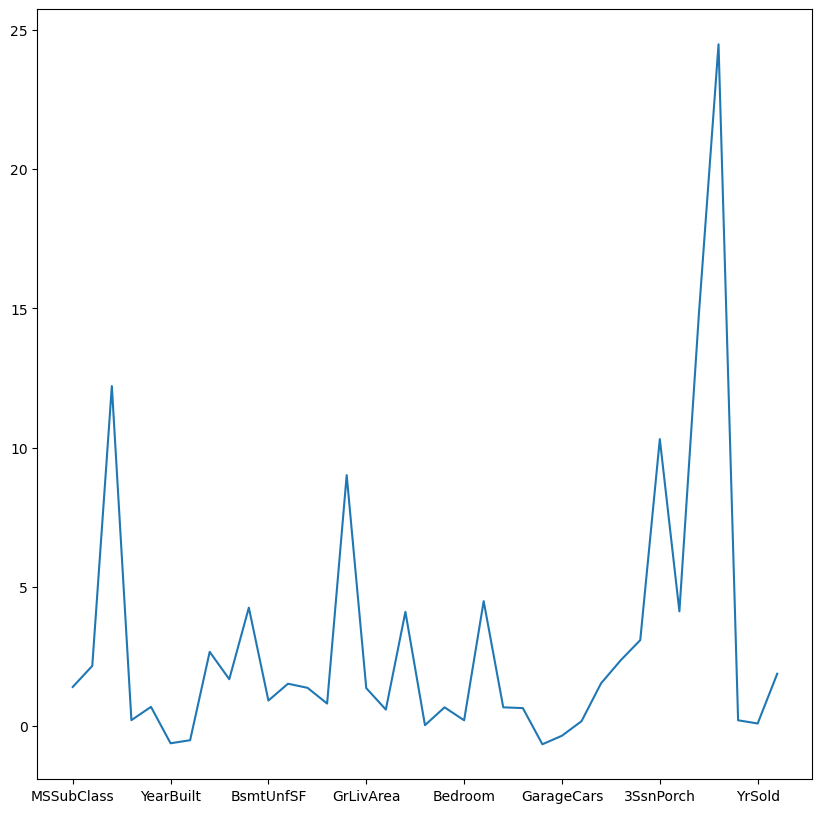

In [701]:
# make bigger plot 
# drop Id
numeric_df.drop('Id', axis=1, inplace=True)
plt.figure(figsize=(10,10))
numeric_df.skew(axis = 0, skipna = True).plot()


MSSubclass & YrSold are the most skewed

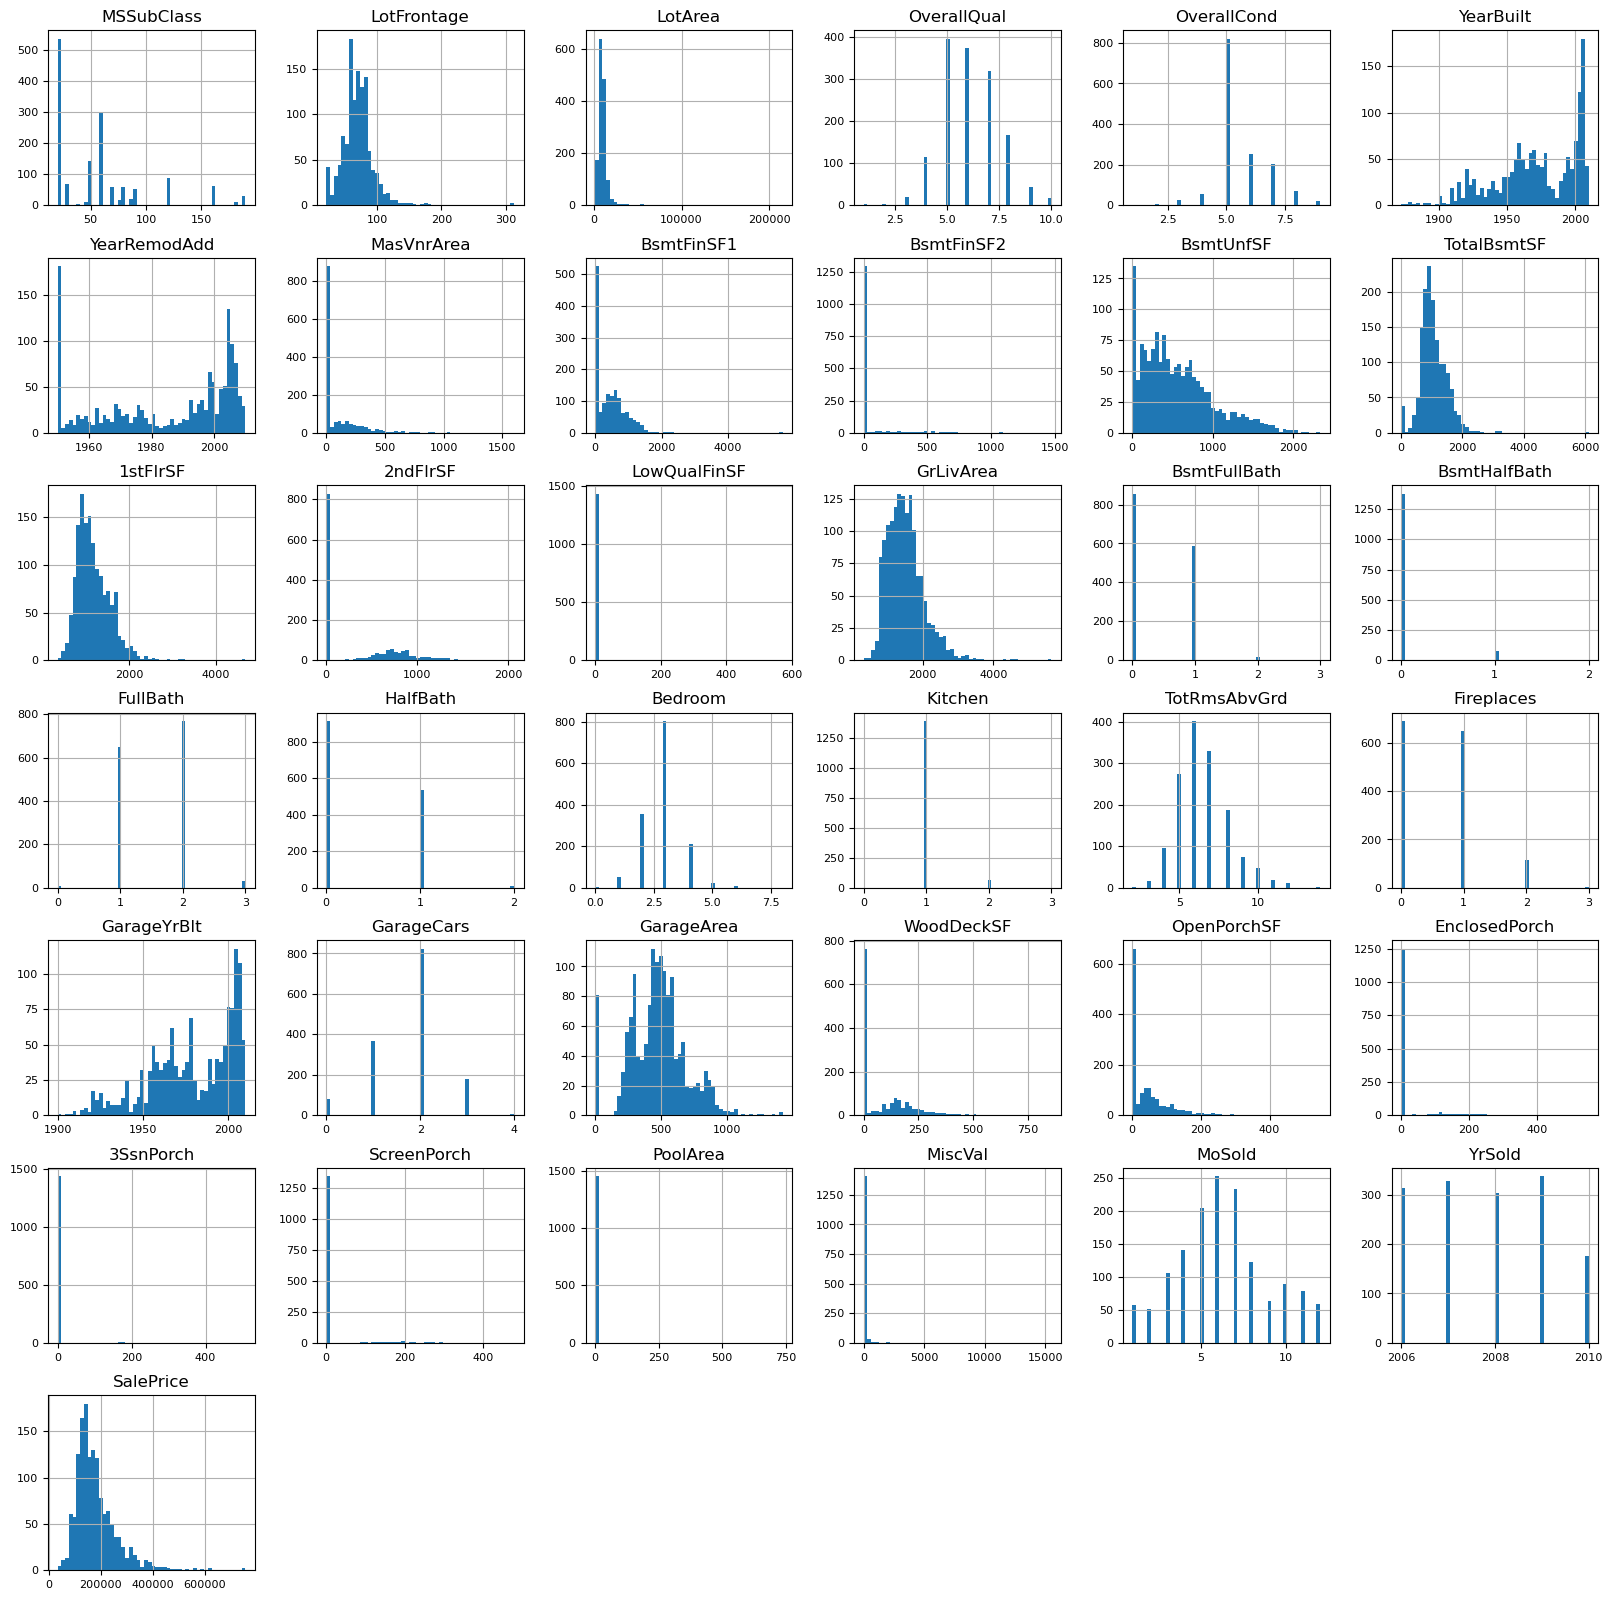

In [702]:
#identify the distribution of the data
numeric_df.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8);


On the above graphs the following are skewed left:
1. LotArea
2. LotFrontage
3. MasVnrArea
4. BsmtFinSF1
5. BsmtFinSF2
6. TotalBsmtSF
7. 1stFlrSF
8. LowQualFinSF
9. GrLivArea
10. GarageArea
11. WoodDeckSF
12. OpenPorchSF
13. EnclosedPorch
14. 3SsnPorch
15. MiscVal
15. SalePrice

On the above graphs the following are skewed right:
1. GarageYrBuilt

Data needs to be normalized in EDA

c. Identify significant variables using a correlation matrix

<AxesSubplot:>

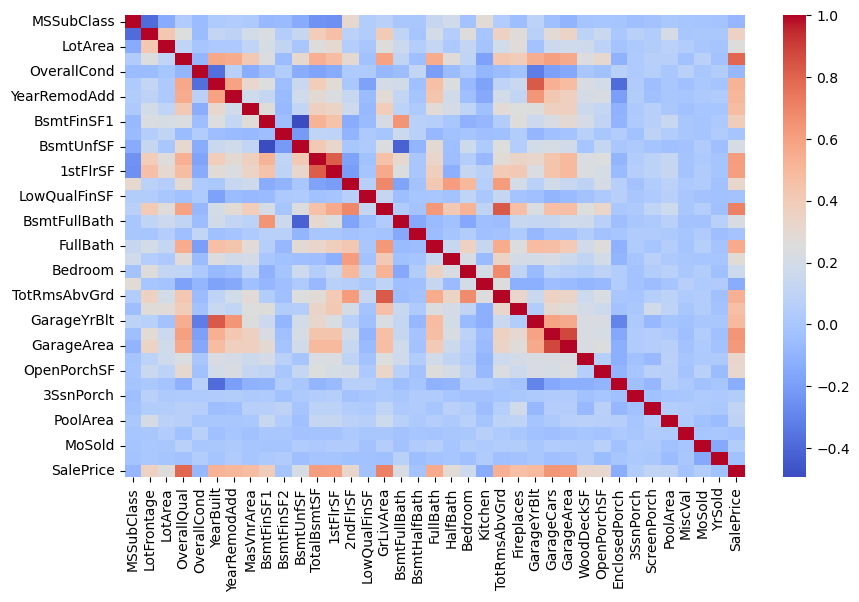

In [703]:
# Id significant variables using a correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap='coolwarm')


Observations from above correlation matrix:

1. OverallQual and SalePrice are highly correlated
2. GrLivArea and TotRmsAbvGrd are highly correlated
3. GarageCars and GarageArea are highly correlated
4. TotalBsmtSF and 1stFlrSF are highly correlated
5. YearBuilt and GarageYrBuilt are highly correlated
    

In [704]:
# a lot of data correlates to SalePrice
# identify the top 10 variables
numeric_df.corr()['SalePrice'].sort_values(ascending=False).head(10)


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

<AxesSubplot:>

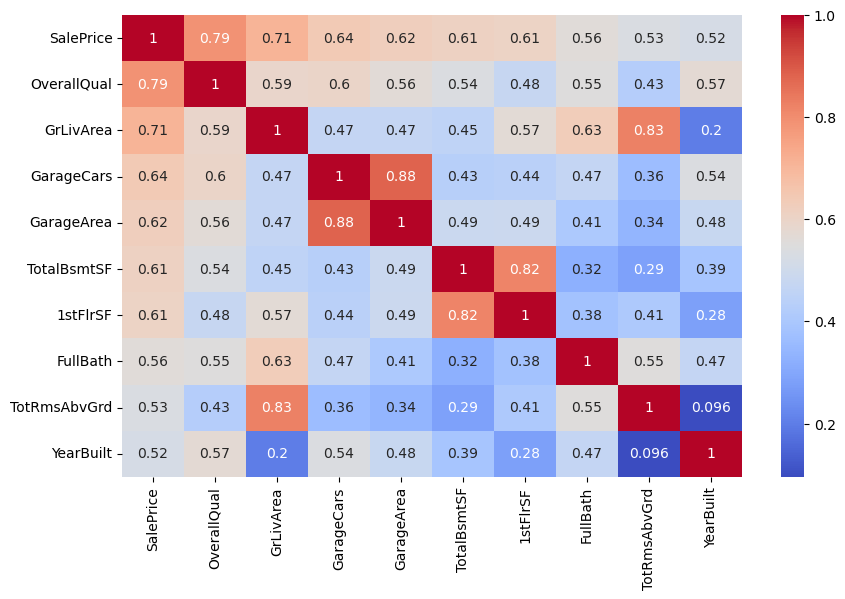

In [649]:
#SalePrice correlation matrix
k = 10 #top number of variables for heatmap
cols = numeric_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = numeric_df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')



Observations from above correlation matrix:
1. SalePrice and OverallQual are highly correlated
2. SalePrice and GrLivArea are highly correlated
3. SalePrice and GarageCars are highly correlated
4. SalePrice and TotalBsmtSF are highly correlated  
5. SalePrice and FullBath are highly correlated

Which makes sense when you are looking for indicators for what a home is worth.

d. Pair plot for density

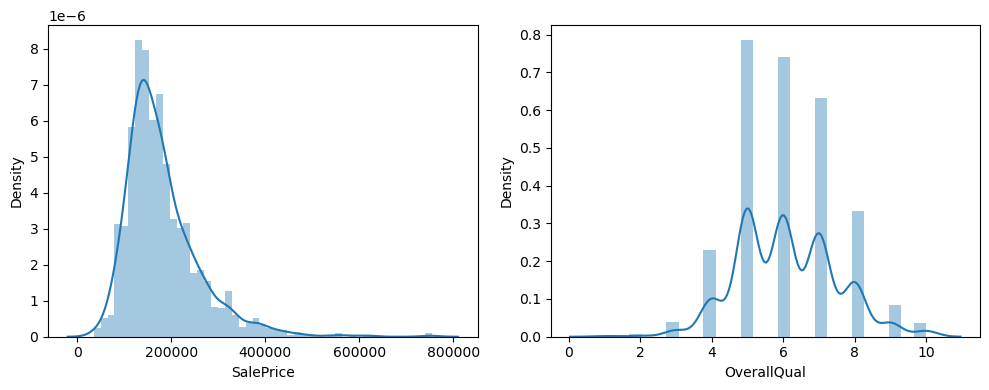

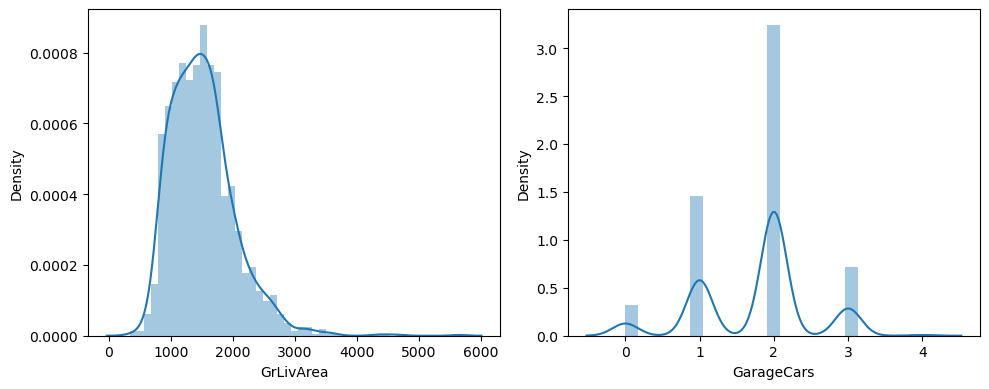

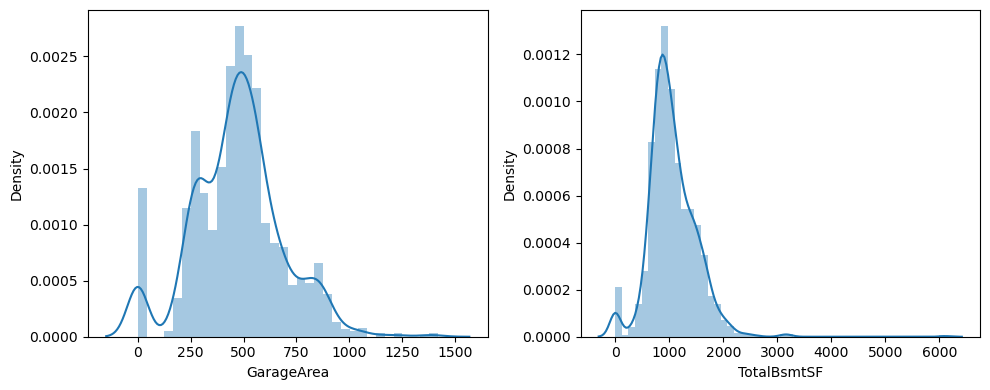

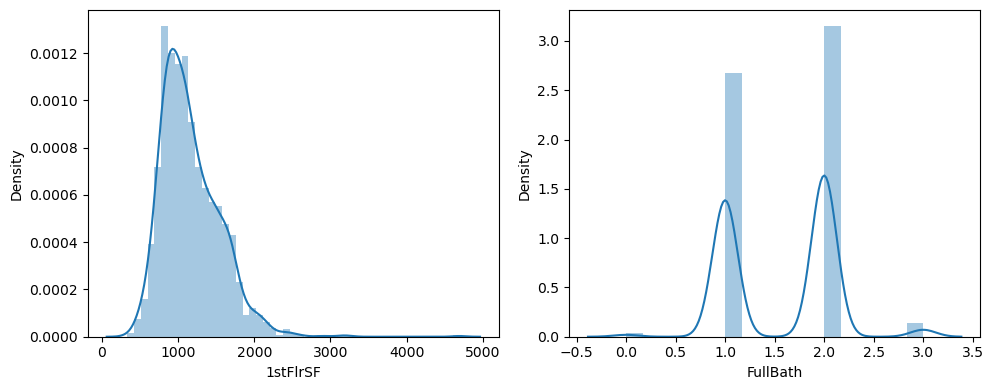

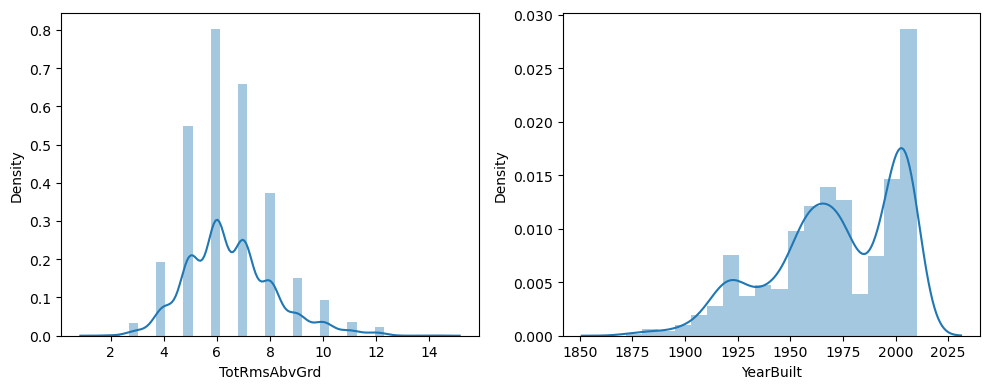

In [650]:
#Pair plot for kernel density estimation
cols = [ 
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    '1stFlrSF',
    'FullBath',
    'TotRmsAbvGrd',
    'YearBuilt']

for i in range(0,len(cols),2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(df[cols[i]], hist=True, kde=True)
    plt.subplot(122)
    sns.distplot(df[cols[i+1]], hist=True, kde=True)
    plt.tight_layout()
    plt.show()


On the above graphs the following are skewed left:
1. density vs SalePrice
2. density vs GrLivArea
3. density vs 1stFlrSF
4. density vs TotalBsmtSF

On the above graphs the following are skewed right:
1. density vs LotArea
2. density vs BsmtFinSF1
3. density vs GarageArea
4. density vs WoodDeckSF

Most data is left or right skewed so a transformation is required to make them linear.


### 4. EDA of categorical variables
a. Missing Value treatment

In [651]:
# Missing Value Treatment of Categorical Values 
categoric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [652]:
#in ascending order
categoric_df.isna().sum(axis=0).sort_values(ascending=False)


PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
GarageType         81
GarageCond         81
GarageQual         81
GarageFinish       81
BsmtFinType2       38
BsmtExposure       38
BsmtFinType1       37
BsmtQual           37
BsmtCond           37
MasVnrType          8
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

In [653]:
percentage_of_missing_values_MiscFeature = (categoric_df['MiscFeature'].isna().sum(axis=0)/categoric_df.shape[0])*100
percentage_of_missing_values_MiscFeature


96.30136986301369

In [654]:
percentage_of_missing_values_alley = (categoric_df['Alley'].isna().sum(axis=0)/categoric_df.shape[0])*100
percentage_of_missing_values_alley


93.76712328767123

In [655]:
# Drop columns "Alley" & "MiscFeature" because of the high numbers of rows with missing values
categoric_df.drop(['Alley','MiscFeature'], axis=1, inplace=True)


In [656]:
categoric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [657]:
categoric_df.shape



(1460, 41)

#### b. Count plot for bivariate analysis

In [658]:
# print the count values of values for each column
for i in categoric_df.columns:
    print (i , ":", categoric_df[i].value_counts())
    print (" _ "*40)
    print (" _ "*40)


MSZoning : RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Street : Pave    1454
Grvl       6
Name: Street, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
LotShape : Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
LandCont

In [659]:
for i in categoric_df.columns:
    print (i , ":", df[i].unique())
    print (" _ "*40)
    print (" _ "*40)



MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
Street : ['Pave' 'Grvl']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
LotShape : ['Reg' 'IR1' 'IR2' 'IR3']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
LandContour : ['Lvl' 'Bnk' 'Low' 'HLS']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
 _  _  _

In [660]:
# drop columns which are not important features in the dataset
categoric_df = categoric_df.drop(['Street','Utilities','CentralAir'], axis=1)   
categoric_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   LotShape       1460 non-null   object
 2   LandContour    1460 non-null   object
 3   LotConfig      1460 non-null   object
 4   LandSlope      1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   Condition1     1460 non-null   object
 7   Condition2     1460 non-null   object
 8   BldgType       1460 non-null   object
 9   HouseStyle     1460 non-null   object
 10  RoofStyle      1460 non-null   object
 11  RoofMatl       1460 non-null   object
 12  Exterior1st    1460 non-null   object
 13  Exterior2nd    1460 non-null   object
 14  MasVnrType     1452 non-null   object
 15  ExterQual      1460 non-null   object
 16  ExterCond      1460 non-null   object
 17  Foundation     1460 non-null   object
 18  BsmtQual       1423 non-null

In [661]:
categoric_df.columns


Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [662]:
categoric_df.shape


(1460, 38)

<AxesSubplot:xlabel='count', ylabel='Neighborhood'>

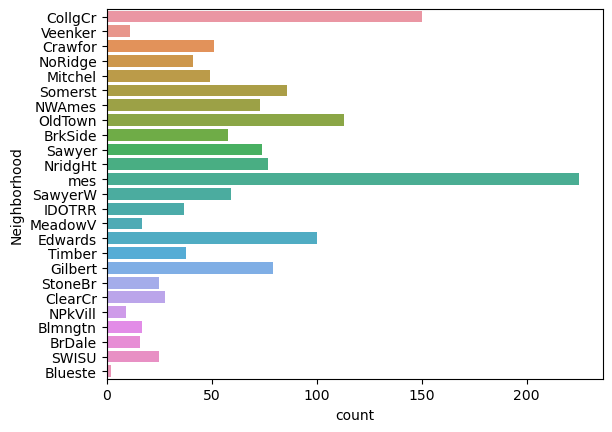

In [663]:
# count plot 
sns.countplot(y='Neighborhood', data=categoric_df)


<AxesSubplot:xlabel='count', ylabel='SaleCondition'>

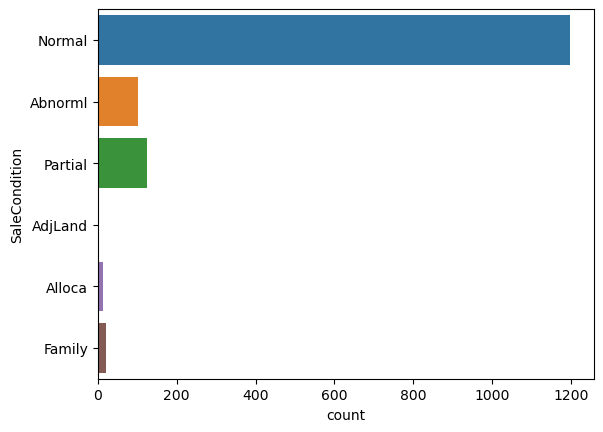

In [664]:
# count plot 
sns.countplot(y='SaleCondition', data=categoric_df)


In [665]:
crosstab = pd.crosstab(index=categoric_df["Neighborhood"], columns=categoric_df["SaleCondition"])
crosstab


SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Neighborhood,,,,,,
Blmngtn,0,0,0,0,12,5
Blueste,0,0,0,0,2,0
BrDale,3,0,0,1,12,0
BrkSide,3,0,0,1,54,0
ClearCr,3,0,0,0,24,1
CollgCr,3,0,0,0,129,18
Crawfor,3,0,2,2,43,1
Edwards,8,4,2,0,82,4
Gilbert,1,0,0,2,64,12


<AxesSubplot:xlabel='Neighborhood'>

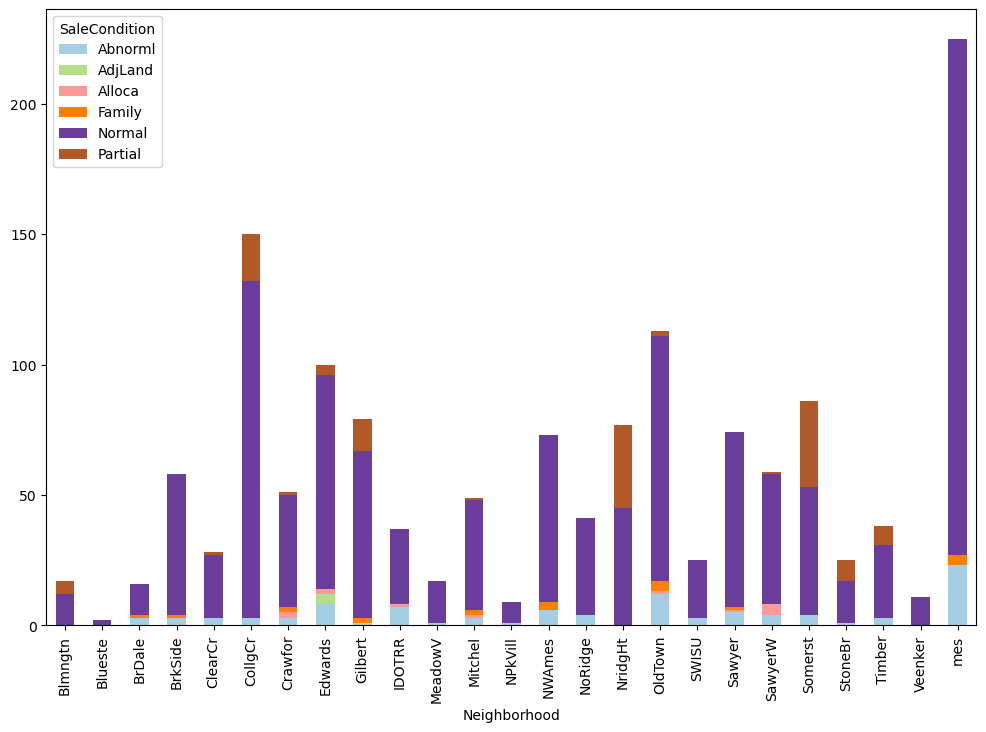

In [666]:
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')


#### c. Identify significant variables using p-values and Chi-Square values

In [667]:
#id significant variables using p-values and Chi-Square values


In [676]:
categoric_df.columns



Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [673]:
from scipy.stats import chi2_contingency

import pandas as pd
import scipy.stats as stats

# define list of columns to analyze
cols_to_analyze = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
                   'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                   'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                   'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC','Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC','Fence', 'SaleType', 'SaleCondition']

# create empty lists to store results
significant_cols = []
chi2_values = []
p_values = []

# loop through columns and perform chi-square test
for col in cols_to_analyze:
    # create contingency table
    contingency_table = pd.crosstab(df[col], df['SalePrice'])
    # perform chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    # check if p-value is less than 0.05
    if p < 0.05:
        significant_cols.append(col)
        chi2_values.append(chi2)
        p_values.append(p)

# create results DataFrame
results_df = pd.DataFrame({'Column': significant_cols, 'Chi-Square Value': chi2_values, 'P-Value': p_values})

# print results
print(results_df)


           Column  Chi-Square Value       P-Value
0        MSZoning       3147.891116  4.348325e-11
1        LotShape       2446.235357  4.724729e-12
2       LotConfig       2771.985455  4.580621e-02
3    Neighborhood      16898.755790  1.364960e-08
4      MasVnrType       2280.776459  9.975416e-07
5       ExterQual       2849.766648  4.250289e-34
6       ExterCond       3192.840248  9.869790e-13
7      Foundation       3669.192231  9.664522e-06
8        BsmtQual       2592.616061  7.805558e-22
9        BsmtCond       2447.285248  1.905078e-14
10   BsmtExposure       2278.026873  1.098007e-07
11        Heating       4201.387994  2.477753e-24
12    KitchenQual       2811.800408  1.282074e-31
13    FireplaceQu       2020.077958  2.564373e-04
14   GarageFinish       1604.578780  1.035589e-09
15     GarageQual       3107.055639  2.538429e-13
16       SaleType       6099.794453  4.560785e-14
17  SaleCondition       3950.739397  5.613396e-14


### 5. Combine all the significant categorical and numerical variables

In [705]:
#significant numeric variables
numeric_df.corr()['SalePrice'].sort_values(ascending=False).head(10)

#significant categorical variables
print(results_df)

# combine all the significant variables together
combined_df = pd.concat([results_df, numeric_df], axis=1)
combined_df.head()



           Column  Chi-Square Value       P-Value
0        MSZoning       3147.891116  4.348325e-11
1        LotShape       2446.235357  4.724729e-12
2       LotConfig       2771.985455  4.580621e-02
3    Neighborhood      16898.755790  1.364960e-08
4      MasVnrType       2280.776459  9.975416e-07
5       ExterQual       2849.766648  4.250289e-34
6       ExterCond       3192.840248  9.869790e-13
7      Foundation       3669.192231  9.664522e-06
8        BsmtQual       2592.616061  7.805558e-22
9        BsmtCond       2447.285248  1.905078e-14
10   BsmtExposure       2278.026873  1.098007e-07
11        Heating       4201.387994  2.477753e-24
12    KitchenQual       2811.800408  1.282074e-31
13    FireplaceQu       2020.077958  2.564373e-04
14   GarageFinish       1604.578780  1.035589e-09
15     GarageQual       3107.055639  2.538429e-13
16       SaleType       6099.794453  4.560785e-14
17  SaleCondition       3950.739397  5.613396e-14


,Column,Chi-Square Value,P-Value,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,MSZoning,3147.891116,4.348325e-11,60,65.0,8450,7,5,2003,2003,...,0,61,0,0,0,0,0,2,2008,208500
1,LotShape,2446.235357,4.724729e-12,20,80.0,9600,6,8,1976,1976,...,298,0,0,0,0,0,0,5,2007,181500
2,LotConfig,2771.985455,4.580621e-02,60,68.0,11250,7,5,2001,2002,...,0,42,0,0,0,0,0,9,2008,223500
3,Neighborhood,16898.755790,1.364960e-08,70,60.0,9550,7,5,1915,1970,...,0,35,272,0,0,0,0,2,2006,140000
4,MasVnrType,2280.776459,9.975416e-07,60,84.0,14260,8,5,2000,2000,...,192,84,0,0,0,0,0,12,2008,250000


### 6. Plot box plot for the new dataset to find the variables with outliers

In [ ]:
# box plot for the new dataset to find the variables with outliers
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
sns.boxplot(combined_df['SalePrice'])
plt.subplot(4,2,2)
sns.boxplot(combined_df['OverallQual'])
plt.subplot(4,2,3)
sns.boxplot(combined_df['GrLivArea'])
plt.subplot(4,2,4)
sns.boxplot(combined_df['GarageCars'])
plt.subplot(4,2,5)
sns.boxplot(combined_df['GarageArea'])
plt.subplot(4,2,6)
sns.boxplot(combined_df['TotalBsmtSF'])
plt.subplot(4,2,7)
sns.boxplot(combined_df['1stFlrSF'])
plt.subplot(4,2,8)
sns.boxplot(combined_df['YearBuilt'])
plt.tight_layout()
plt.show()
